**Rainfall Prediction : Harnessing Machine Learning for Weather Forecasting**

Objective: Develop a machine learning model to predict rainfall using historical weather data. Explore patterns, enhance prediction accuracy, and contribute insights for applications in agriculture, water resource management, and disaster preparedness.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This project dataset is madeup  of daily weather observations from numerous locations across Australia. It encompasses a wide range of meteorological data points including temperature, rainfall, wind speed, humidity, and atmospheric pressure. Each entry in the dataset provides detailed information on weather conditions for a specific day and location. the target variable of this dataset is RainTomorrow, this variable indicates whether there will be rainfall on following day.it has 142193 rows and  24 columns.



**Loading** **Dataset**

In [ ]:
data=pd.read_csv('/content/weatherAUS.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


 **Data Preprocessing and Exploration**

In [ ]:
data.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [ ]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [ ]:
data.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,142193,142193,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132863,132923.000000,132180,...,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,140787,142193.000000,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2
top,2013-12-01,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No
freq,49,3418,NaN,NaN,NaN,NaN,NaN,9780,NaN,11393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109332,NaN,110316
mean,NaN,NaN,12.186400,23.226784,2.349974,5.469824,7.624853,NaN,39.984292,NaN,...,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,NaN,2.360682,NaN
std,NaN,NaN,6.403283,7.117618,8.465173,4.188537,3.781525,NaN,13.588801,NaN,...,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,NaN,8.477969,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,NaN,0.000000,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.900000,NaN,31.000000,NaN,...,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,NaN,0.000000,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.500000,NaN,39.000000,NaN,...,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,NaN,0.000000,NaN
75%,NaN,NaN,16.800000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,NaN,0.800000,NaN


In [ ]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [ ]:
data['Location'].value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [ ]:
data['RainToday'].value_counts()

No     109332
Yes     31455
Name: RainToday, dtype: int64

In [ ]:
data['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

**Data Visualization**

<Axes: xlabel='RainTomorrow', ylabel='count'>

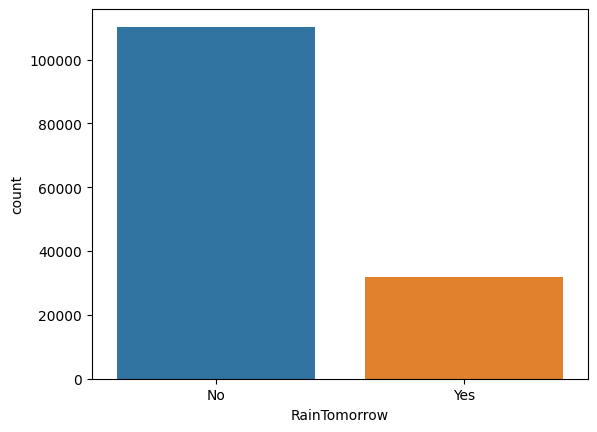

In [ ]:
sns.countplot(x=data['RainTomorrow'])

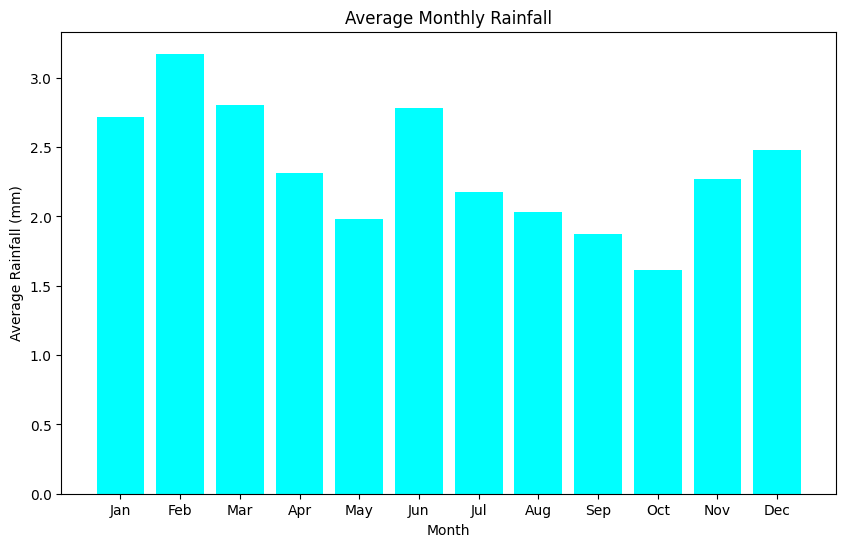

In [ ]:

# Convert the 'Date' column to datetime and extract the mont
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month

# Rainfall Analysis (average monthly rainfall)
rainfall_analysis =data.groupby('Month')['Rainfall'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(rainfall_analysis['Month'], rainfall_analysis['Rainfall'], color='cyan')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.title('Average Monthly Rainfall')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


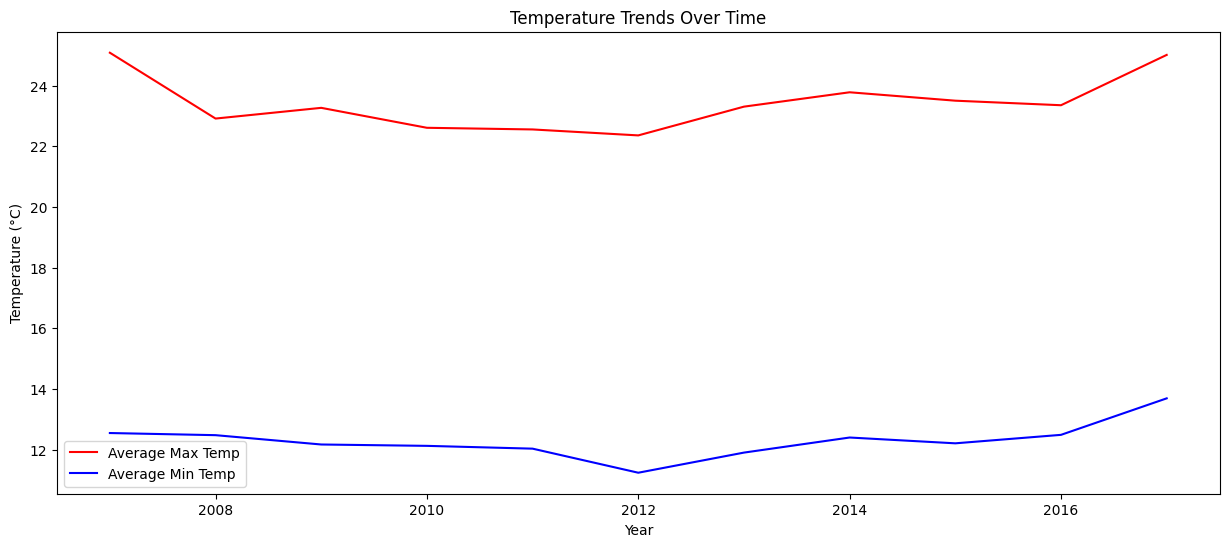

In [ ]:

# Temperature Trends Over Time (yearly average of Max and Min temperatures)
data['Year'] = data['Date'].dt.year
temp_trends = data.groupby('Year')[['MaxTemp', 'MinTemp']].mean().reset_index()


# Plotting
plt.figure(figsize=(15, 6))

# Temperature Trends plot

plt.plot(temp_trends['Year'], temp_trends['MaxTemp'], label='Average Max Temp', color='red')
plt.plot(temp_trends['Year'], temp_trends['MinTemp'], label='Average Min Temp', color='blue')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trends Over Time')
plt.legend()



In [ ]:
# Convert 'Date' column back to string format
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')


In [ ]:
data=data.drop(['Month','Year'],axis=1)

<ipython-input-16-052490f26890>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap="coolwarm", fmt='.2f')


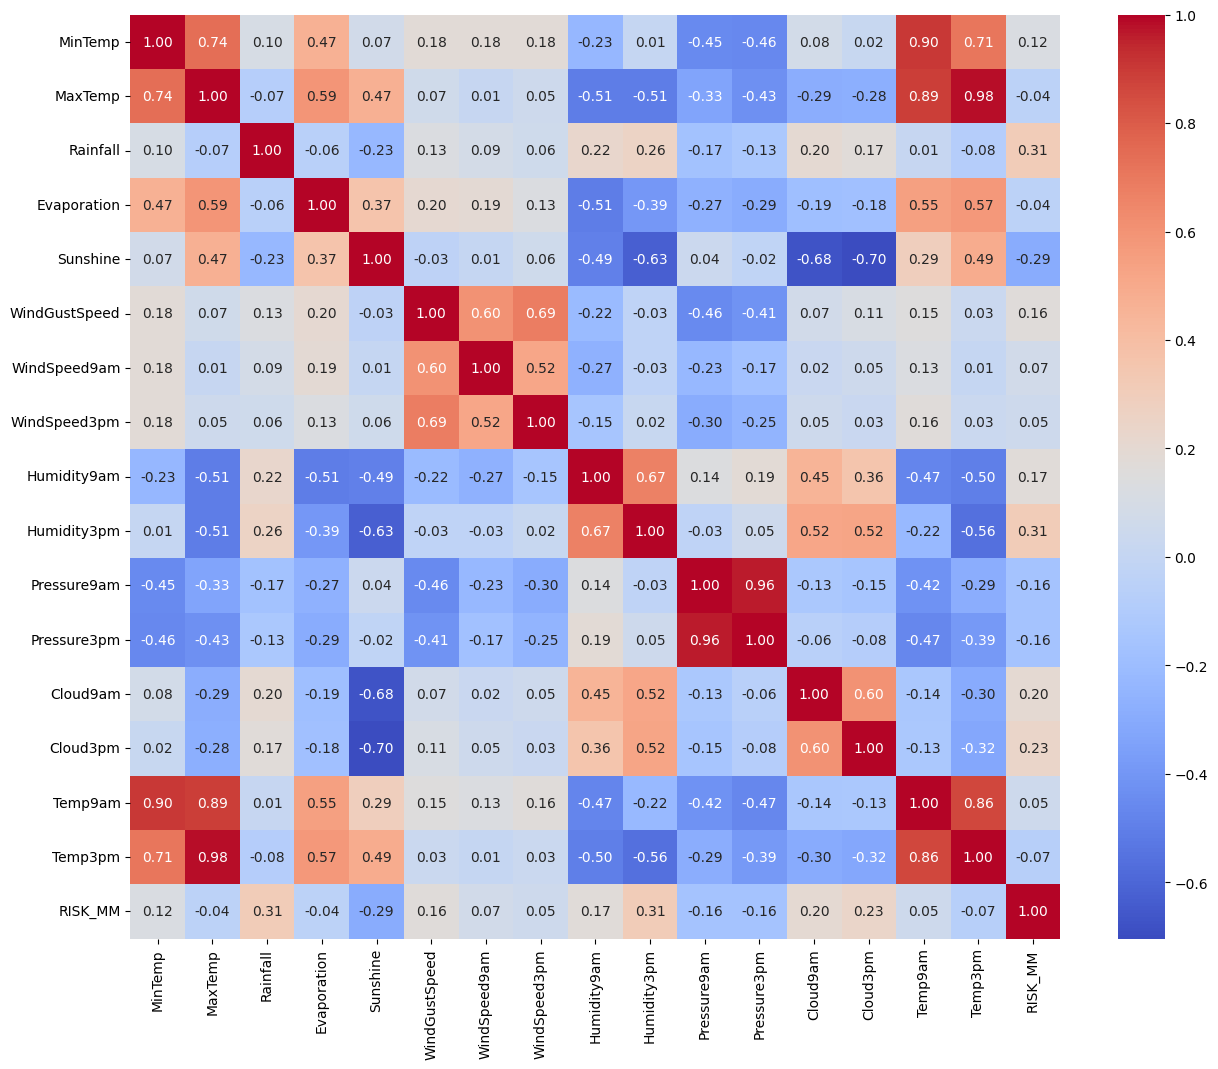

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm", fmt='.2f')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [ ]:
data.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

**Handling Missing Values**

In [ ]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

remaining_missing_values = data[numerical_columns].isnull().sum()
remaining_missing_values

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
dtype: int64

In [ ]:
data['WindGustDir']=data['WindGustDir'].fillna(data['WindGustDir'].mode())
data['WindDir9am']=data['WindDir9am'].fillna(data['WindDir9am'].mode())
data['WindDir3pm']=data['WindDir3pm'].fillna(data['WindDir3pm'].mode())
data['RainToday']=data['RainToday'].fillna(data['RainToday'].mode())

**Remove outliers using the IQR method**

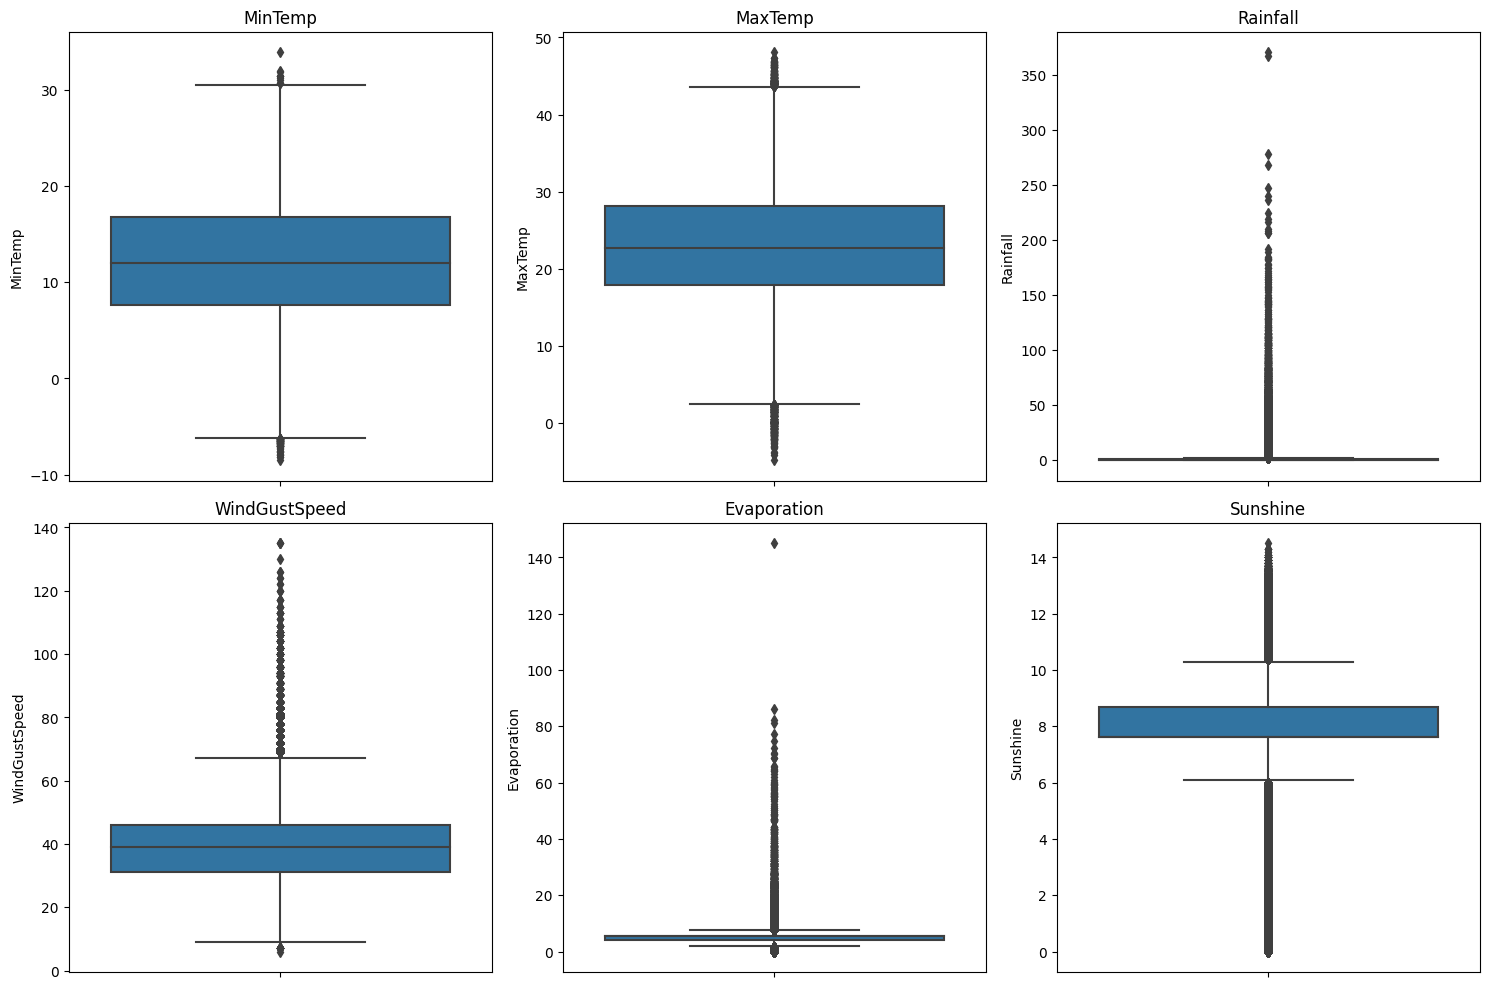

In [ ]:
# Selecting key columns for box plots
columns_boxplot = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Evaporation', 'Sunshine']

# Creating box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_boxplot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()


In [ ]:
#  remove outliers using the IQR method
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out the outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

# Removing outliers from the specified columns
cleaned_data = remove_outliers(data, columns_boxplot)



In [ ]:
cleaned_data.shape

(60437, 24)

In [ ]:
categorical=[x for x in cleaned_data.columns if cleaned_data[x].dtypes=='O']
print('categorical columns are',categorical)

categorical columns are ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
for i in categorical:
    cleaned_data[i]=lbl.fit_transform(cleaned_data[i])
cleaned_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,187,2,13.4,22.9,0.6,5.469824,7.624853,13,44.0,13,...,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0,0.0,0
1,188,2,7.4,25.1,0.0,5.469824,7.624853,14,44.0,6,...,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0,0.0,0
2,189,2,12.9,25.7,0.0,5.469824,7.624853,15,46.0,13,...,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0,0.0,0
3,190,2,9.2,28.0,0.0,5.469824,7.624853,4,24.0,9,...,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0,1.0,0
4,191,2,17.5,32.3,1.0,5.469824,7.624853,13,41.0,1,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3221,41,3.5,21.8,0.0,5.469824,7.624853,0,31.0,2,...,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9,0,0.0,0
142189,3222,41,2.8,23.4,0.0,5.469824,7.624853,0,31.0,9,...,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4,0,0.0,0
142190,3223,41,3.6,25.3,0.0,5.469824,7.624853,6,22.0,9,...,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5,0,0.0,0
142191,3224,41,5.4,26.9,0.0,5.469824,7.624853,3,37.0,9,...,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1,0,0.0,0


In [ ]:
cleaned_data.dtypes

Date               int64
Location           int64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int64
WindGustSpeed    float64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RISK_MM          float64
RainTomorrow       int64
dtype: object

In [ ]:
cleaned_data['RainTomorrow'].value_counts()

0    51138
1     9299
Name: RainTomorrow, dtype: int64

**Splitting into Training and Testing data**

In [ ]:
a=cleaned_data.iloc[:,:-1]
b=cleaned_data.iloc[:,-1]

**Balancing**

In [ ]:
from imblearn.over_sampling import SMOTE
oversampling=SMOTE()
x,y=oversampling.fit_resample(a,b)

In [ ]:
y.value_counts()

0    51138
1    51138
Name: RainTomorrow, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

**Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


**Model Selection and Evaluation**

In [ ]:
from sklearn.naive_bayes import GaussianNB
navie=GaussianNB()
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier(n_estimators=100)
from sklearn.svm import SVC
vctr=SVC()
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [ ]:
#from os import access
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
models=[navie,random,vctr,gbm,tree,knn]
Accuracy=[]
for i in models:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  score=accuracy_score(y_test,y_pred)
  Accuracy.append(score)
  print('################')

  print(confusion_matrix(y_test,y_pred))
  print('################')
  print(classification_report(y_test,y_pred))

GaussianNB()
################
[[14654   787]
 [    0 15242]]
################
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     15441
           1       0.95      1.00      0.97     15242

    accuracy                           0.97     30683
   macro avg       0.98      0.97      0.97     30683
weighted avg       0.98      0.97      0.97     30683

RandomForestClassifier()
################
[[15441     0]
 [    0 15242]]
################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15441
           1       1.00      1.00      1.00     15242

    accuracy                           1.00     30683
   macro avg       1.00      1.00      1.00     30683
weighted avg       1.00      1.00      1.00     30683

SVC()
################
[[15322   119]
 [  708 14534]]
################
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     1544

In [ ]:
accuracy_scores = {
    'Random Forest classifier':1.0,
    'GradientBoostingClassifier': 1.0,
    'DecisionTreeClassifier':1.0,
    'KNN': 0.85,
    'SVC':0.97,
    'naive_bayes':0.97
}

accuracy_df = pd.DataFrame.from_dict(accuracy_scores, orient='index', columns=['Accuracy'])
print(accuracy_df)

                            Accuracy
Random Forest classifier        1.00
GradientBoostingClassifier      1.00
DecisionTreeClassifier          1.00
KNN                             0.85
SVC                             0.97
naive_bayes                     0.97
